<a href="https://colab.research.google.com/github/Arun-AP-9/Flu-Shot-Learning/blob/master/Flu_Shot_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

In this challenge, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

This is a driven data machine learning competition based on past learnings from pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world

https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

In [2]:
# in colab, we will use google drive to load the data

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# let us load the train features data first

#import pandas first

import pandas as pd

import numpy as np

df_train_features = pd.read_csv('/content/gdrive/My Drive/Driven Data/Flu Shot/training_set_features.csv',index_col='respondent_id')

# check the head of the data

df_train_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
# let us also load in the train labels 

df_train_labels = pd.read_csv('/content/gdrive/My Drive/Driven Data/Flu Shot/training_set_labels.csv',index_col='respondent_id')

# check the head of the data

df_train_labels.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


Okay, it is important to note that in this competition, there are two target variables to predict.

h1n1_vaccine - Whether respondent received H1N1 flu vaccine.

seasonal_vaccine - Whether respondent received seasonal flu vaccine.

In [5]:
# let us combine the train features and labels as we want to do some EDA on it

# we will combine with the index column

df_train = pd.merge(df_train_features, df_train_labels, how ='inner',left_index=True,right_index=True)

# let us see if this has worked

df_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# EDA on the training data

Let us analyse this data with some EDA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


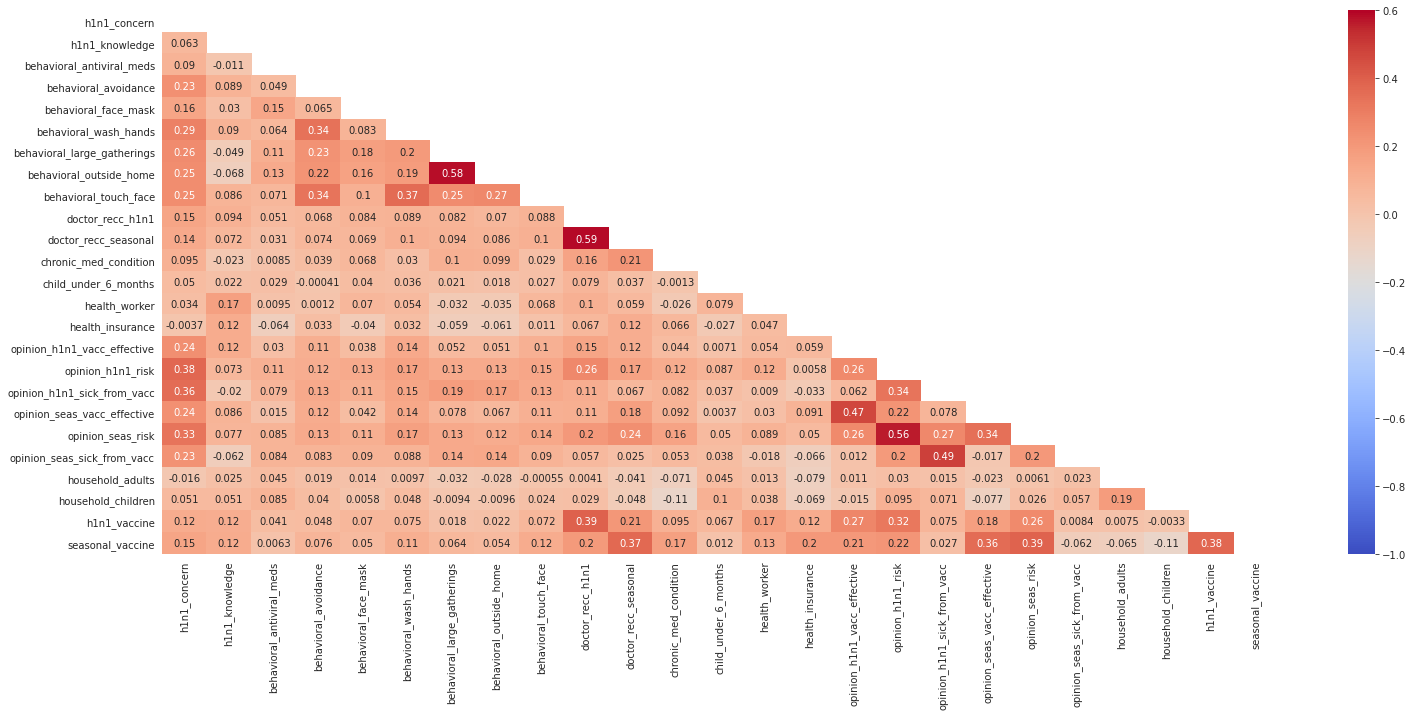

In [6]:
# let us try a correlation plot from seaborn

import seaborn as sns

import matplotlib.pyplot as plt

# select a numeric subset of the train data

df_train_numeric = df_train.select_dtypes(include='number')

plt.figure(figsize=(25,10))

# following part of script is to create a mask to take off duplicate part of the correlation matrix

corr = np.corrcoef(np.random.randn(25, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

  sns.heatmap(df_train_numeric.corr(),vmin=-1,vmax=0.6,cmap='coolwarm',annot=True, mask=mask)

Well, there seems to be only a few positive correlations (in the numeric columns) about getting vaccinated

1. strongest correlation is doctor rec h1n1 vaccine

2. public opinion about risk of h1n1 or seasonal flu and finally

3. public opinion about effectiveness of vaccine

Let us analyse these factors in a little more detail


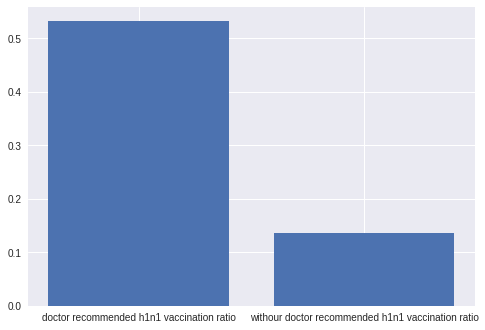

In [7]:
# how effective is a doctor's recommendation

# let us group by and analyse - doctor's recommendation is a simple binary yes/no

doc_recommended = len(df_train[df_train['doctor_recc_h1n1']==1])

not_recommended = len(df_train[df_train['doctor_recc_h1n1']==0])

doc_recommended_h1n1_true = len(df_train[(df_train['doctor_recc_h1n1']==1) & (df_train['h1n1_vaccine']==1) ])

not_recommended_h1n1_true = len(df_train[(df_train['doctor_recc_h1n1']==0) & (df_train['h1n1_vaccine']==1) ])

ratio_doc_recommended = doc_recommended_h1n1_true/doc_recommended

ratio_not_recommended = not_recommended_h1n1_true/not_recommended

x = ['doctor recommended h1n1 vaccination ratio','withour doctor recommended h1n1 vaccination ratio']

y = [ratio_doc_recommended, ratio_not_recommended ]

#Use seaborn as style sheet for charts

plt.style.use('seaborn')

plt.bar(x,y)

plt.show()


So there it, there is definitely a better chance of getting a person vaccinated if you have recommendations from a doctor.

Maybe something to think for policy makers in covid-19. Mobilise family doctors to recommend vaccinations and lead to herd immunity

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


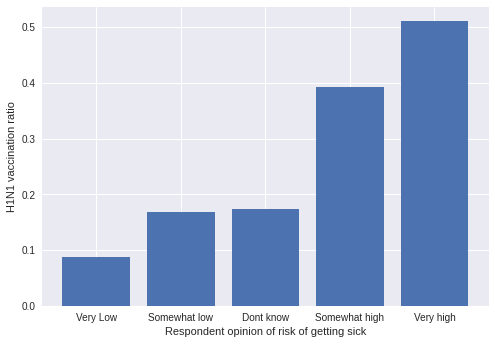

In [9]:
# let us now have a look at opinion_h1n1_risk i.e. Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
# 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high

# let us define an eda_test dataframe for our experiments and shrink to the columns of interest in this case

eda_test = df_train[['opinion_h1n1_risk','h1n1_vaccine']]

# convert the target column to category and apply get dummies for easier analysis

eda_test['h1n1_vaccine'] = eda_test['h1n1_vaccine'].astype('category')

eda_test3 = pd.get_dummies(eda_test)

eda_test5 = eda_test3.groupby(by='opinion_h1n1_risk').sum()

# add two columns for sum of each opinion and ratio

eda_test5['total'] = eda_test5['h1n1_vaccine_0'] + eda_test5['h1n1_vaccine_1']

eda_test5['ratio of h1n1 vaccination success'] = eda_test5['h1n1_vaccine_1']/eda_test5['total']

x =  ['Very Low','Somewhat low','Dont know','Somewhat high','Very high']

y = eda_test5['ratio of h1n1 vaccination success']

#Use seaborn as style sheet for charts

plt.xlabel('Respondent opinion of risk of getting sick')

plt.ylabel('H1N1 vaccination ratio')

plt.style.use('seaborn')

plt.bar(x,y)

plt.show()

Again another public message to authorities? Convey clearly about the risks of a pandemic. The more the public understand the risk, the more chances that they will get vaccinated and achieve herd immunity

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


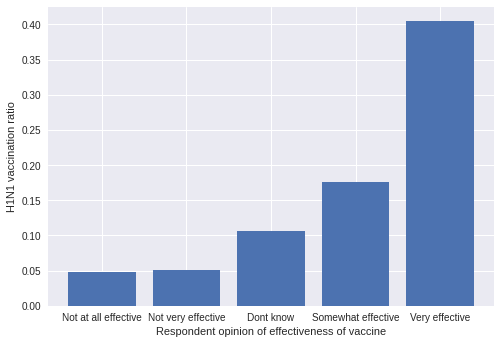

In [10]:
# let us do some eda on respondent's opinion about H1N1 vaccine effectiveness i.e. opinion_h1n1_vacc_effective

#  1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

# let us define an eda_test dataframe for our experiments and shrink to the columns of interest in this case

eda_test = df_train[['opinion_h1n1_vacc_effective','h1n1_vaccine']]

# convert the target column to category and apply get dummies for easier analysis

eda_test['h1n1_vaccine'] = eda_test['h1n1_vaccine'].astype('category')

eda_test3 = pd.get_dummies(eda_test)

eda_test5 = eda_test3.groupby(by='opinion_h1n1_vacc_effective').sum()

# add two columns for sum of each opinion and ratio

eda_test5['total'] = eda_test5['h1n1_vaccine_0'] + eda_test5['h1n1_vaccine_1']

eda_test5['ratio of h1n1 vaccination success'] = eda_test5['h1n1_vaccine_1']/eda_test5['total']

x =  ['Not at all effective','Not very effective','Dont know','Somewhat effective','Very effective']

y = eda_test5['ratio of h1n1 vaccination success']

#Use seaborn as style sheet for charts

plt.xlabel('Respondent opinion of effectiveness of vaccine')

plt.ylabel('H1N1 vaccination ratio')

plt.style.use('seaborn')

plt.bar(x,y)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


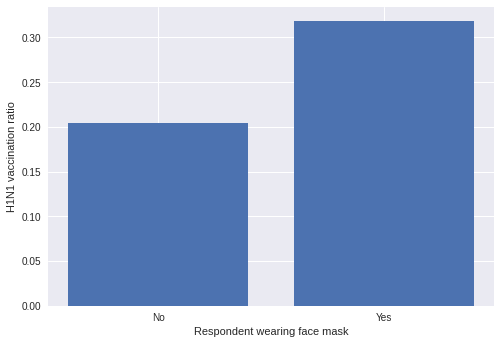

In [11]:
# let us do some eda to see if wearng face masks and gettng vaccinated has any correlation

#  we will use column behavioral_face_mask which is simply binary

# let us define an eda_test dataframe for our experiments and shrink to the columns of interest in this case

eda_test = df_train[['behavioral_face_mask','h1n1_vaccine']]

# convert the target column to category and apply get dummies for easier analysis

eda_test['h1n1_vaccine'] = eda_test['h1n1_vaccine'].astype('category')

eda_test3 = pd.get_dummies(eda_test)

eda_test5 = eda_test3.groupby(by='behavioral_face_mask').sum()

# add two columns for sum of each opinion and ratio

eda_test5['total'] = eda_test5['h1n1_vaccine_0'] + eda_test5['h1n1_vaccine_1']

eda_test5['ratio of h1n1 vaccination success'] = eda_test5['h1n1_vaccine_1']/eda_test5['total']

x =  ['No', 'Yes']

y = eda_test5['ratio of h1n1 vaccination success']

#Use seaborn as style sheet for charts

plt.xlabel('Respondent wearing face mask')

plt.ylabel('H1N1 vaccination ratio')

plt.style.use('seaborn')

plt.bar(x,y)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


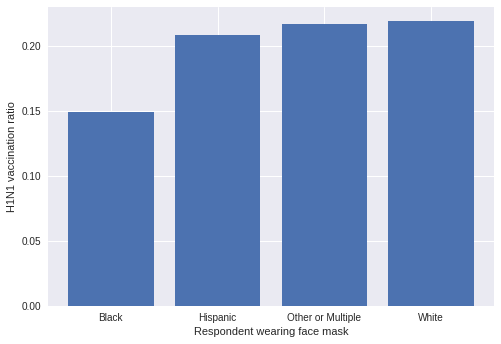

In [12]:
# how about some eda on some categorical features

# say 'race' for e.g

#  we will use column behavioral_face_mask which is simply binary

# let us define an eda_test dataframe for our experiments and shrink to the columns of interest in this case

eda_test = df_train[['race','h1n1_vaccine']]

# convert the target column to category and apply get dummies for easier analysis

eda_test['h1n1_vaccine'] = eda_test['h1n1_vaccine'].astype('category')

eda_test3 = pd.get_dummies(eda_test,columns=['h1n1_vaccine'])

eda_test5 = eda_test3.groupby(by='race').sum()

# add two columns for sum of each opinion and ratio

eda_test5['total'] = eda_test5['h1n1_vaccine_0'] + eda_test5['h1n1_vaccine_1']

eda_test5['ratio of h1n1 vaccination success'] = eda_test5['h1n1_vaccine_1']/eda_test5['total']

x =  eda_test5.index

y = eda_test5['ratio of h1n1 vaccination success']

#Use seaborn as style sheet for charts

plt.xlabel('Respondent wearing face mask')

plt.ylabel('H1N1 vaccination ratio')

plt.style.use('seaborn')

plt.bar(x,y)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


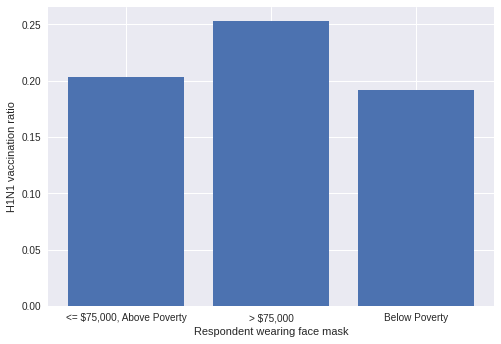

In [13]:
# how about income levels 'income_poverty' for e.g

#  we will use column 'income_poverty' which is categorical and has values

# Below Poverty, <= $75,000, Above Poverty, > $75,000 

# let us define an eda_test dataframe for our experiments and shrink to the columns of interest in this case

eda_test = df_train[['income_poverty','h1n1_vaccine']]

# convert the target column to category and apply get dummies for easier analysis

eda_test['h1n1_vaccine'] = eda_test['h1n1_vaccine'].astype('category')

eda_test3 = pd.get_dummies(eda_test,columns=['h1n1_vaccine'])

eda_test5 = eda_test3.groupby(by='income_poverty').sum()

# add two columns for sum of each opinion and ratio

eda_test5['total'] = eda_test5['h1n1_vaccine_0'] + eda_test5['h1n1_vaccine_1']

eda_test5['ratio of h1n1 vaccination success'] = eda_test5['h1n1_vaccine_1']/eda_test5['total']

x =  eda_test5.index

y = eda_test5['ratio of h1n1 vaccination success']

#Use seaborn as style sheet for charts

plt.xlabel('Respondent wearing face mask')

plt.ylabel('H1N1 vaccination ratio')

plt.style.use('seaborn')

plt.bar(x,y)

plt.show()

# Preprocessing the data

Let us now go ahead and pre-process the data for our machine learning models

In [32]:
# let us check whch of the columns have null values in the train data

null_columns=df_train_features.columns[df_train_features.isnull().any()]

df_train_features[null_columns].isnull().sum().div(len(df_train_features)).sort_values(ascending=False)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_seasonal           0.080878
doctor_recc_h1n1               0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_h1n1_sick_from_vacc    0.014790
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
household_adults               0.009323
household_children             0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004343
h1n1_concern                   0.003445


We can clearly see there are a lot of missing values in employment_occupation,  employment_industry  and health_insurance.

Let us remove these columns and for the rest perform imputations

In [34]:
df_train_features3 = df_train_features.drop(columns=['employment_occupation','employment_industry','health_insurance'])

# see if this has worked

df_train_features3.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')

In [35]:
# For imputation, we are going to follow the pipeline architecture along with the column transformer 

# let us first examine the data types for this task

df_train_features3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [36]:
# we need to convert the object columns to categories, let us do that

# use a for loop to convert all of these columns into categoris

df_train_features5 = df_train_features3.select_dtypes(include='object')

columns_obj_train= df_train_features5.columns

for col in columns_obj_train:
    df_train_features3[col] = df_train_features3[col].astype('category')
    
# has the converson happened
    
df_train_features3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_concern                 26615 non-null  float64 
 1   h1n1_knowledge               26591 non-null  float64 
 2   behavioral_antiviral_meds    26636 non-null  float64 
 3   behavioral_avoidance         26499 non-null  float64 
 4   behavioral_face_mask         26688 non-null  float64 
 5   behavioral_wash_hands        26665 non-null  float64 
 6   behavioral_large_gatherings  26620 non-null  float64 
 7   behavioral_outside_home      26625 non-null  float64 
 8   behavioral_touch_face        26579 non-null  float64 
 9   doctor_recc_h1n1             24547 non-null  float64 
 10  doctor_recc_seasonal         24547 non-null  float64 
 11  chronic_med_condition        25736 non-null  float64 
 12  child_under_6_months         25887 non-null  float64 
 13  h

In [0]:
# for imputation let us use simple imputer for categories and then one hot encode it

# for imputation of numerical columns we will use the KNN Imputer

# of course, we will use the pipeline architecture

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import KNNImputer

numeric_transformer = Pipeline(steps=[('imputer',KNNImputer(missing_values=np.nan, n_neighbors=5) ),('scaler',StandardScaler())])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [0]:
# Next we will use the ColumnTransformer to apply all the feature engineering very neatly and in a single step

# Before building this we will create two lists of the numeric and categorical columns using the pandas dtype method

numeric_features = df_train_features3.select_dtypes(include=['int64', 'float64']).columns

categorical_features = df_train_features3.select_dtypes(include=['category']).columns 

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



# Building Linear models with Sci-kit learn

In this competition, we are going to work exclusively with linear classification models specifically logistic regression and SVM's

In [58]:
# first let us split the data for training

# and define the features and labels for training

X = df_train_features3

y = df_train_labels

# let us import train test split

from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3,random_state= 9619)

print(len(y))

print(len(X))

print(len(X_train))

print(len(y_train))


26707
26707
18694
18694


In [72]:
# let us bring in the logistic regression classifier

from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsRestClassifier

# instantiate the logistic regeression classifier

# we will use the OnevsRestClassifier as we need to predict multi labels

lr = OneVsRestClassifier(LogisticRegression(random_state=9619,solver='liblinear'))

lr_pipe = Pipeline(steps=[('preprocessor', preprocessor),('classifier',  lr)])

# train the model

lr_pipe.fit(X_train, y_train)
    
# Predict the labels of the test set

y_pred = lr_pipe.predict(X_test)
           
# Evaluate accuracies using cross_val_score

from sklearn.model_selection import cross_val_score
      
cv_scores = cross_val_score(lr_pipe,X,y,cv=5, scoring='roc_auc',n_jobs=-1).mean()
          
# print the cv_scores for each classifier

cv_scores


0.8372781959392274

In [73]:
# can we use predict proba?

y_pred_proba = lr_pipe.predict_proba(X_test)

y_pred_proba

array([[0.06550719, 0.90595632],
       [0.14869326, 0.05583828],
       [0.10739479, 0.45620357],
       ...,
       [0.12569962, 0.46473655],
       [0.26385156, 0.74136695],
       [0.01523067, 0.15986798]])

In [74]:
# access the logistic regression coefficients

lr_pipe.steps[1][1].coef_

array([[-0.13210869,  0.09193605,  0.05374742, -0.02974797,  0.03699918,
         0.0117761 , -0.09236317,  0.00202609,  0.00488719,  0.78536974,
        -0.22281585,  0.04804279,  0.0650905 ,  0.24933769,  0.59410627,
         0.44373623,  0.01044244,  0.09465445,  0.22604829, -0.09073561,
         0.0136417 , -0.01013484, -0.21668157, -0.29633397, -0.2577333 ,
         0.09716491,  0.24405805, -0.13940459, -0.2179236 ,  0.03000454,
        -0.10220223, -0.36110651, -0.08337011,  0.0882276 , -0.07327687,
        -0.26869241, -0.16083347, -0.16238923, -0.09928496, -0.16785169,
        -0.14487017, -0.28465571, -0.18422167, -0.24530421, -0.16959659,
        -0.13370736, -0.12622194, -0.13334973,  0.07002104, -0.12247098,
        -0.11528944, -0.06323346,  0.00682765, -0.20171552,  0.09598328,
         0.05464991, -0.02094863, -0.18561233, -0.10951053, -0.13440302],
       [-0.01899027,  0.11939152,  0.01472836, -0.01730068,  0.00126187,
         0.02509647,  0.00829773, -0.0256915 ,  0.